In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [7]:
dataset= pd.read_csv('Iris.csv')
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
# Drop the 'Id' column since it doesn't contribute to classification
dataset = dataset.drop(columns=['Id'])

In [9]:
dataset.info()
print(dataset['Species'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [10]:
# Check for missing values
print(dataset.isnull().sum())

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


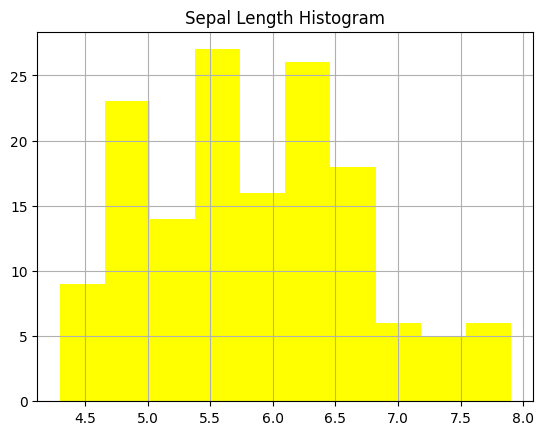

In [22]:
# Explore feature distributions using histograms
dataset['SepalLengthCm'].hist(color='Yellow')
plt.title('Sepal Length Histogram')
plt.show()

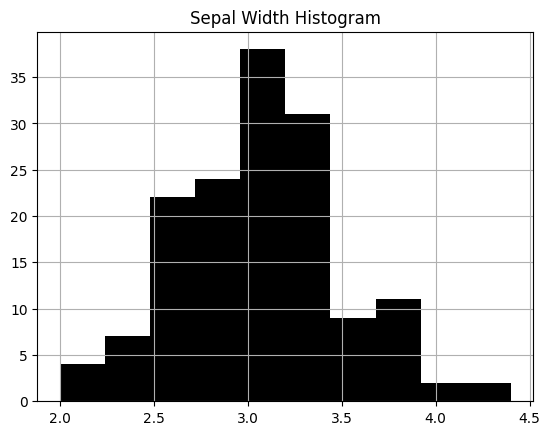

In [21]:
dataset['SepalWidthCm'].hist(color='Black')
plt.title('Sepal Width Histogram')
plt.show()

In [14]:
# Encode the 'Species' column using LabelEncoder
le = LabelEncoder()
dataset['Species'] = le.fit_transform(dataset['Species'])

In [15]:
# Select only numeric columns for correlation computation
numeric_columns = dataset.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954   
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544   
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757   
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000   
Species             0.782561     -0.419446       0.949043      0.956464   

                Species  
SepalLengthCm  0.782561  
SepalWidthCm  -0.419446  
PetalLengthCm  0.949043  
PetalWidthCm   0.956464  
Species        1.000000  


In [16]:
# Split the data into features (X) and target (Y)
X = dataset.drop(columns=['Species'])
Y = dataset['Species']

In [17]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [18]:
# Initialize the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [19]:
# Prepare new sample for prediction with correct column names
new_sample = pd.DataFrame([[9.8, 4.6, 2.5, 0.6]], columns=X.columns)

In [20]:
 #we can change the value 

# Predict the type of iris from the species
predicted_species = le.inverse_transform(model.predict(new_sample))

print("Predicted Species:", predicted_species)

Predicted Species: ['Iris-versicolor']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


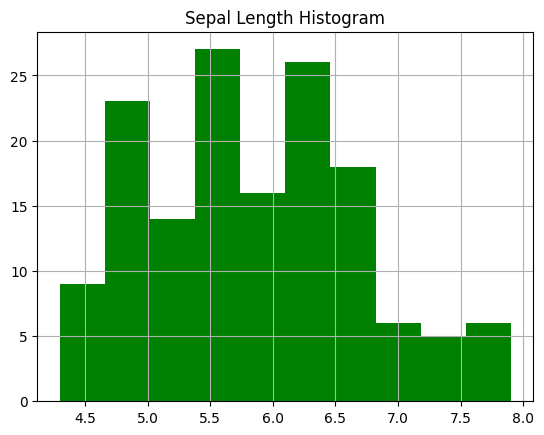

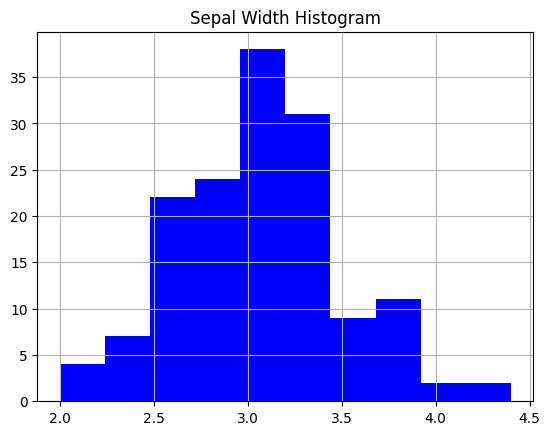

               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954   
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544   
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757   
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000   
Species             0.782561     -0.419446       0.949043      0.956464   

                Species  
SepalLengthCm  0.782561  
SepalWidthCm  -0.419446  
PetalLengthCm  0.949043  
PetalWidthCm   0.956464  
Species        1.000000  
Predicted Species: ['Iris-versicolor']
Accuracy: 100.00%


In [1]:
# Evaluate the accuracy of the model on the test data.
accuracy = model.score(X_test, Y_test)

print("Accuracy: {:.2f}%".format(accuracy * 100))